Last updated: 15 Feb 2023

# 👋 PyCaret Regression Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [1]:
# check installed version (must be >3.0)
import pycaret
import pandas as pd
pycaret.__version__

'3.2.0'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [2]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = pd.read_csv('BikeDataset/hour.csv')

## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [3]:
# import pycaret regression and init setup
#Ignored 'casual' & 'registered' since in assignment outline we were asked to NOT include it in attribute / features
# temp: Normalized temperature in Celsius, a continuous variable.
# atemp: Normalized feeling temperature in Celsius, a continuous variable.
# hum: Normalized humidity, a continuous variable.
# windspeed: Normalized wind speed, a continuous variable.
# casual: Count of casual users, although a count, it’s a discrete numerical variable.
# registered: Count of registered users, also a discrete numerical variable.
# cnt: Count of total rental bikes, a discrete numerical variable.
from pycaret.regression import *
#s = setup(data, target='cnt', session_id=123, ignore_features=['instant', 'dteday', 'casual', 'registered']  ,numeric_features = ['temp', 'atemp', 'hum', 'windspeed', 'weekday', ] ,categorical_features = ['season', 'yr', 'mnth' ,'holiday', 'workingday', 'weathersit', 'hr', ], verbose=False)
#s = setup(data, target='cnt', session_id=123, ignore_features=['instant', 'dteday', 'casual', 'registered']  ,numeric_features = ['temp', 'atemp', 'hum', 'windspeed', 'mnth', 'weekday', 'hr'] ,categorical_features = ['season', 'yr', 'holiday', 'workingday', 'weathersit'], verbose=False)
s = setup(data, target='cnt', session_id=123, ignore_features=['instant', 'dteday', 'casual', 'registered'], verbose=False)

Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [4]:
# import RegressionExperiment and init the class
# from pycaret.regression import RegressionExperiment
# exp = RegressionExperiment()

In [5]:
# check the type of exp
# type(exp)

In [6]:
# init setup on exp
# exp.setup(data, target = 'charges', session_id = 123)

You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [7]:
# compare baseline models
best = compare_models()

In [8]:
# compare models using OOP
# exp.compare_models()

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

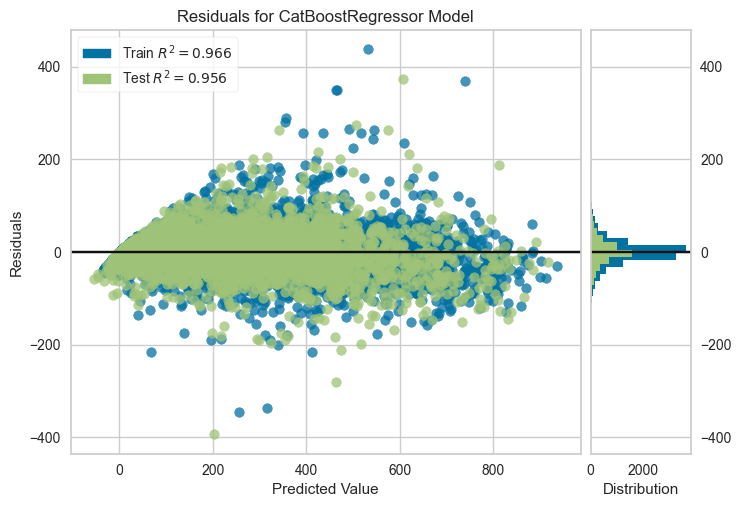

In [9]:
# plot residuals
plot_model(best, plot = 'residuals')

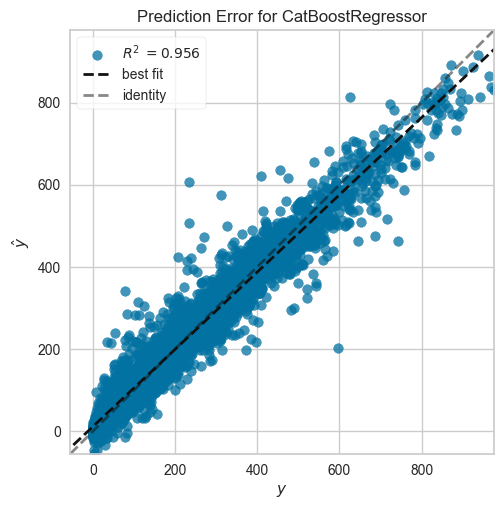

In [10]:
# plot error
plot_model(best, plot = 'error')

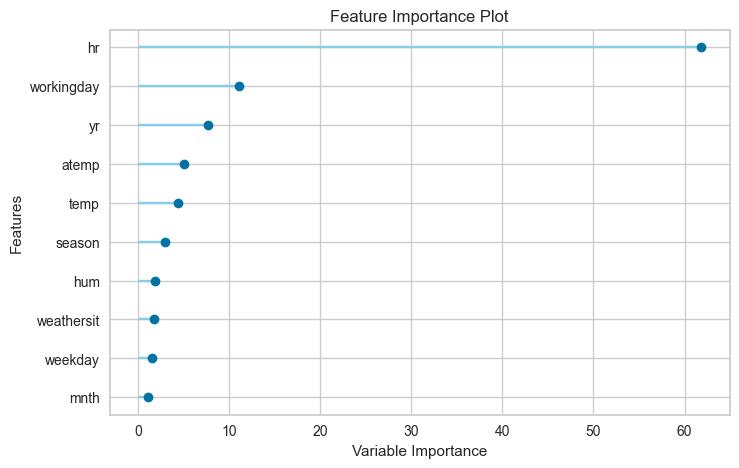

In [11]:
# plot feature importance
plot_model(best, plot = 'feature')

In [12]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [14]:
# predict on test set
holdout_pred = predict_model(best)

In [15]:
# show predictions df
holdout_pred.head()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
5792        3   0     9  19        0        6           0           1  0.70   
7823        4   0    11  14        0        0           0           1  0.62   
15426       4   1    10  23        0        2           1           2  0.48   
15028       4   1     9   9        0        0           0           1  0.50   
12290       2   1     6   7        0        5           1           2  0.64   

        atemp   hum  windspeed  cnt  prediction_label  
5792   0.6667  0.74     0.1343  295        284.961581  
7823   0.6212  0.43     0.4627  313        386.997130  
15426  0.4697  0.77     0.0896   84         97.812453  
15028  0.4848  0.51     0.3284  276        307.039891  
12290  0.5758  0.89     0.1940  402        395.801169

The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [16]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('cnt', axis=1, inplace=True)
new_data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  
0           1  0.24  0.2879  0.81        0.0       3          13  
1           1  0.22  0.2727  0.80        0.0       8          32  
2           1  0.22  0.2727  0.80        0.0       5          27  
3           1  0.24  0.2879  0.75        0.0       3          10  
4           1  0.24  0.2879  0.75        0.0       0           1

In [17]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           1  0.24  0.2879  0.81        0.0       3          13   
1           1  0.22  0.2727  0.80        0.0       8          32   
2           1  0.22  0.2727  0.80        0.0       5          27   
3           1  0.24  0.2879  0.75        0.0       3          10   
4           1  0.24  0.2879  0.75        0.0       0           1   

   prediction_label  
0         41.715366  
1         29.463173  
2         17.266937  
3          8.156385  
4          1.330018

___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [18]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                              'holiday', 'weekday', 'workingday',
                                              'weathersit', 'temp', 'atemp',
                                              'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x000001DDA10EFE90>)]),
 'my_first_pipeline.pkl')

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\jorda\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                             'holiday', 'weekday', 'workingday',
                                             'weathersit', 'temp', 'atemp',
                                             'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x000001DDA1DDF510>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [20]:
s = setup(data, target='cnt', session_id=123, ignore_features=['instant', 'dteday', 'casual', 'registered'], verbose=False)

To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [21]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [22]:
# lets access X_train_transformed
get_config('X_train_transformed')

season   yr  mnth    hr  holiday  weekday  workingday  weathersit  \
1859      2.0  0.0   3.0   6.0      0.0      3.0         1.0         2.0   
7302      4.0  0.0  11.0  21.0      0.0      6.0         0.0         1.0   
17094     4.0  1.0  12.0   1.0      0.0      4.0         1.0         1.0   
17009     4.0  1.0  12.0  12.0      0.0      0.0         0.0         2.0   
1636      1.0  0.0   3.0  17.0      0.0      0.0         0.0         1.0   
...       ...  ...   ...   ...      ...      ...         ...         ...   
96        1.0  0.0   1.0   5.0      0.0      3.0         1.0         1.0   
13435     3.0  1.0   7.0   0.0      0.0      4.0         1.0         1.0   
7763      4.0  0.0  11.0   2.0      0.0      5.0         1.0         1.0   
15377     4.0  1.0  10.0  22.0      0.0      0.0         0.0         1.0   
15725     4.0  1.0  10.0  10.0      0.0      1.0         1.0         1.0   

       temp   atemp   hum  windspeed  
1859   0.34  0.3182  0.87     0.2537  
7302   0.32  0.3485  0.66     0.0000  
17094  0.32  0.3485  0.66     0.0000  
17009  0.38  0.3939  0.82     0.1940  
1636   0.44  0.4394  0.41     0.3582  
...     ...     ...   ...        ...  
96     0.22  0.2273  0.47     0.1642  
13435  0.74  0.6970  0.66     0.0896  
7763   0.28  0.2879  0.81     0.1045  
15377  0.38  0.3939  0.87     0.1343  
15725  0.50  0.4848  0.55     0.0000  

[12165 rows x 12 columns]

In [23]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [24]:
# help(setup)

In [25]:
# init setup with normalize = True
s = setup(data, target='cnt', session_id=123, ignore_features=['instant', 'dteday', 'casual', 'registered'], verbose=False)

<AxesSubplot: >

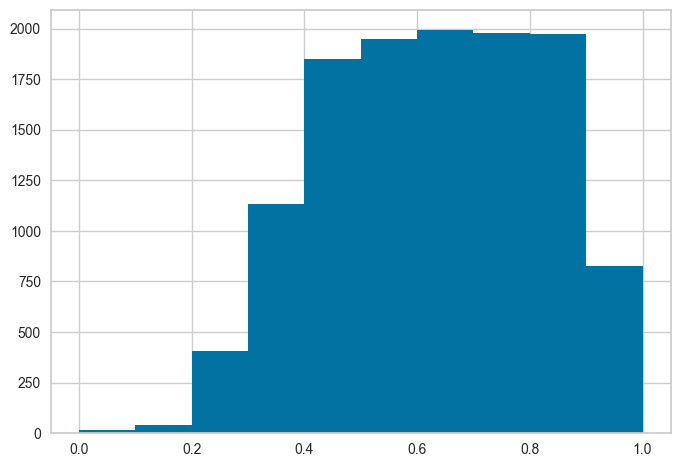

In [26]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['hum'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<AxesSubplot: >

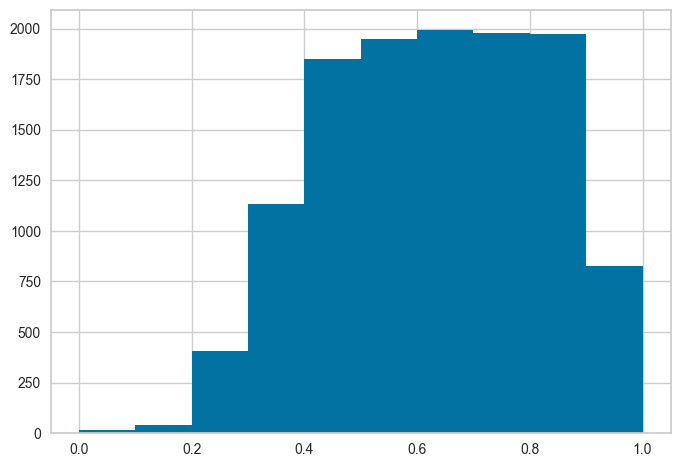

In [27]:
get_config('X_train')['hum'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [28]:
best = compare_models()

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [29]:
# check available models
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [30]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'lightgbm', 'catboost'])

In [31]:
compare_tree_models

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [32]:
compare_tree_models_results = pull()
compare_tree_models_results

Model      MAE        MSE     RMSE  \
catboost               CatBoost Regressor  25.2830  1665.1933  40.7197   
lightgbm  Light Gradient Boosting Machine  26.6137  1807.5006  42.4572   
et                  Extra Trees Regressor  26.0132  1831.7017  42.6846   
rf                Random Forest Regressor  26.5309  1958.5411  44.1677   
dt                Decision Tree Regressor  35.7347  3597.0725  59.7623   
gbr           Gradient Boosting Regressor  47.8208  4944.5863  70.2541   

              R2   RMSLE    MAPE  TT (Sec)  
catboost  0.9490  0.4352  0.4321     0.797  
lightgbm  0.9446  0.4210  0.4221     0.110  
et        0.9439  0.3474  0.3218     0.260  
rf        0.9401  0.3540  0.3273     0.382  
dt        0.8900  0.4591  0.3910     0.013  
gbr       0.8482  0.6820  0.9764     0.107

By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [33]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

In [34]:
# list of top 3 models by MAE
best_mae_models_top3

 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [35]:
# help(compare_models)

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [36]:
# from pycaret.regression import *
# s = setup(data, target = 'charges', log_experiment='mlflow', experiment_name='insurance_experiment')

In [37]:
# compare models
# best = compare_models()

In [38]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [39]:
# help(setup)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [40]:
# check all the available models
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

In [41]:
# train linear regression with default fold=10
lr = create_model('lr')

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [42]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


MAE         MSE      RMSE      R2   RMSLE    MAPE
Fold                                                        
0     104.6382  19219.7213  138.6352  0.3867  1.2220  3.5194
1     106.5786  19828.3863  140.8133  0.4053  1.2202  3.2533
2     102.1802  19179.2108  138.4890  0.4259  1.2012  3.3635
3     108.2100  20964.6966  144.7919  0.3681  1.2039  3.0159
4     103.0288  18478.3640  135.9351  0.3747  1.2577  3.8995
5     101.9627  18845.2644  137.2781  0.4134  1.1811  3.3056
6     108.0872  21116.5135  145.3152  0.3718  1.1897  3.1987
7     106.6412  21251.4581  145.7788  0.3971  1.2451  3.4473
8     105.9435  20148.6773  141.9460  0.3669  1.1988  3.2546
9     103.1497  19297.1663  138.9142  0.4118  1.1923  3.3247
Mean  105.0420  19832.9458  140.7897  0.3922  1.2112  3.3583
Std     2.2474    945.5776    3.3478  0.0203  0.0235  0.2225

In [43]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

In [44]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

LinearRegression(fit_intercept=False, n_jobs=-1)

In [45]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

LinearRegression(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [46]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [47]:
# train a dt model with default params
dt = create_model('dt')

In [48]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [49]:
dt

DecisionTreeRegressor(random_state=123)

In [50]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [51]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [52]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=1.0,
                      min_impurity_decrease=0.01, min_samples_leaf=2,
                      min_samples_split=9, random_state=123)

In [53]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit',
                                                                          'temp',
                                                                          'atemp',
                                                                          'hum',
                                                                          'windspeed'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWra...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                               

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [54]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

[I 2023-11-27 00:41:49,699] Searching the best hyperparameters using 12165 samples...
[I 2023-11-27 00:42:00,849] Finished hyperparameter search!


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [55]:
# help(tune_model)

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [56]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [57]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [58]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [59]:
# top 3 models based on mae
best_mae_models_top3

 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

In [60]:
# blend top 3 models
blend_models(best_mae_models_top3)

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x000001DDB95BF750>),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [61]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [62]:
# stack models
stack_models(best_mae_models_top3)

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x000001DDB95A5C10>),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [63]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

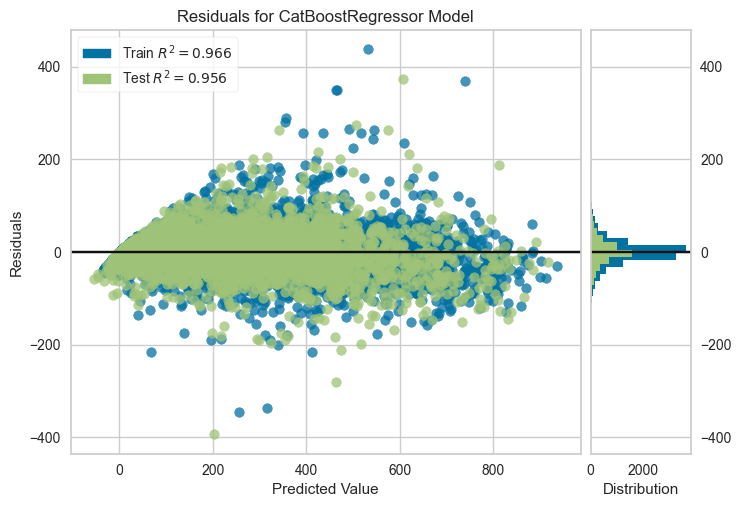

In [64]:
# plot residuals
plot_model(best, plot = 'residuals')

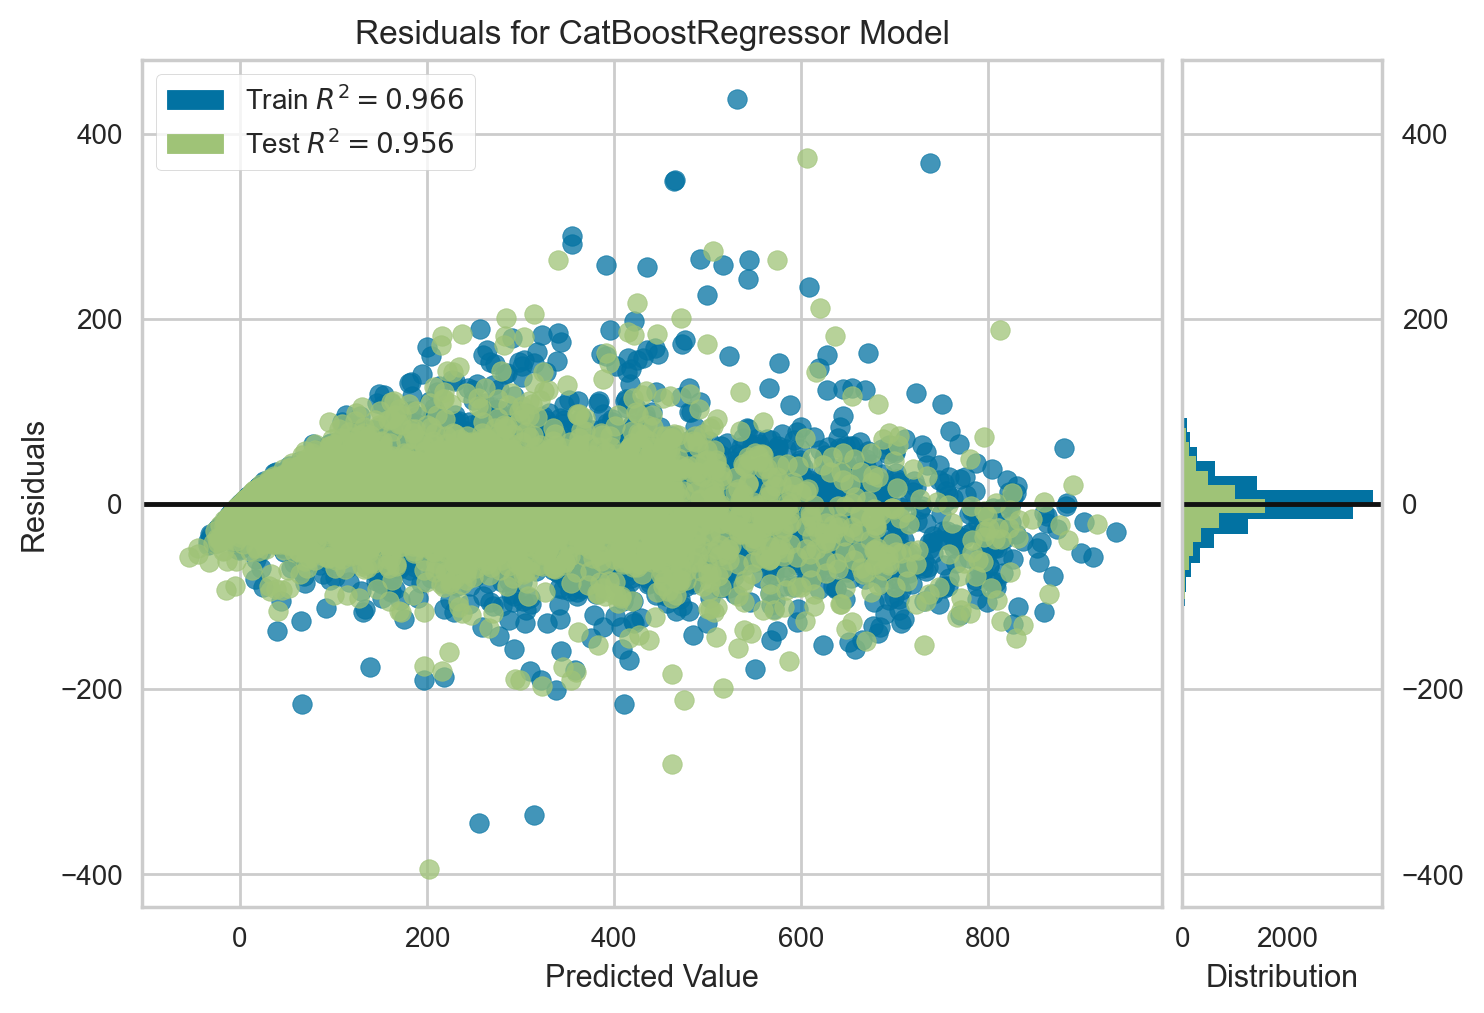

In [65]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [66]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [67]:
# help(plot_model)

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [68]:
# train lightgbm model
lightgbm = create_model('lightgbm')

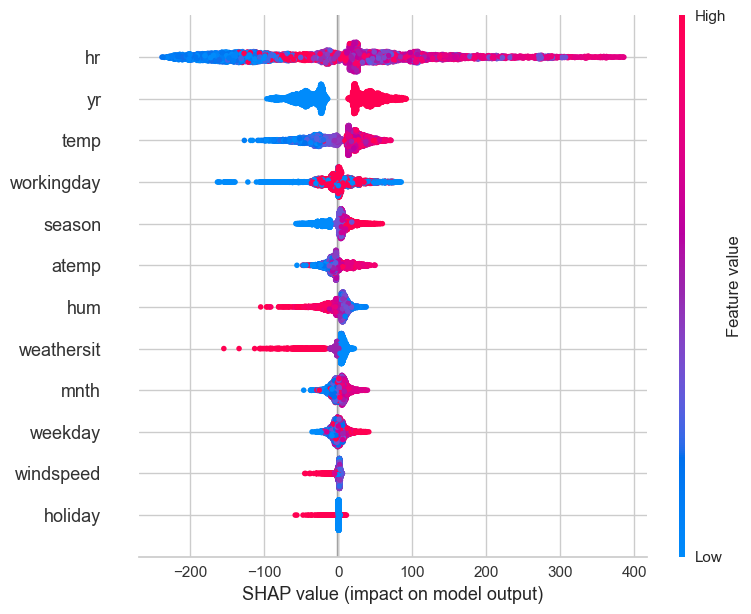

In [69]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [70]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [71]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [72]:
# get leaderboard
lb = get_leaderboard()
lb

Model Name  \
Index                                    
0                    Linear Regression   
1                     Lasso Regression   
2                     Ridge Regression   
3                          Elastic Net   
4               Least Angle Regression   
...                                ...   
57                   Bagging Regressor   
58                  AdaBoost Regressor   
59                    Voting Regressor   
60                  Stacking Regressor   
61     Light Gradient Boosting Machine   

                                                   Model       MAE  \
Index                                                                
0      (TransformerWrapper(include=['season', 'yr', '...  105.0420   
1      (TransformerWrapper(include=['season', 'yr', '...  104.8434   
2      (TransformerWrapper(include=['season', 'yr', '...  105.0407   
3      (TransformerWrapper(include=['season', 'yr', '...  115.5344   
4      (TransformerWrapper(include=['season', 'yr', '...  110.2333   
...                                                  ...       ...   
57     (TransformerWrapper(include=['season', 'yr', '...   28.2430   
58     (TransformerWrapper(include=['season', 'yr', '...   28.6646   
59     (TransformerWrapper(include=['season', 'yr', '...   24.1816   
60     (TransformerWrapper(include=['season', 'yr', '...   23.8737   
61     (TransformerWrapper(include=['season', 'yr', '...   26.6137   

              MSE      RMSE      R2   RMSLE    MAPE  
Index                                                
0      19832.9458  140.7897  0.3922  1.2112  3.3583  
1      19937.8723  141.1655  0.3890  1.2080  3.3229  
2      19832.7554  140.7891  0.3922  1.2111  3.3584  
3      24265.2358  155.7406  0.2565  1.2783  3.9570  
4      22428.8947  148.1366  0.3181  1.2454  3.6071  
...           ...       ...     ...     ...     ...  
57      2225.8695   47.0962  0.9318  0.3668  0.3443  
58      2354.6672   48.4140  0.9279  0.3608  0.3133  
59      1619.9683   40.1599  0.9504  0.3437  0.3076  
60      1554.7643   39.3430  0.9524  0.3896  0.3386  
61      1807.5006   42.4572  0.9446  0.4210  0.4221  

[61 rows x 8 columns]

In [73]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                             'holiday', 'weekday', 'workingday',
                                             'weathersit', 'temp', 'atemp',
                                             'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ['trained_model',
                 StackingRegressor(cv=5,
                                   estimators=[('CatBoost Regressor',
                                                <catboost.core.CatBoostRegressor object at 0x000001DE24B5C450>),
                                               ('Extra Trees Regressor',
                                                ExtraTreesRegressor(n_jobs=-1,
                                                                    random_state=123)),
                                               ('Random Forest Regressor',
                                                RandomForestRegressor(n_jobs=-1,
                                                                      random_state=123))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1, passthrough=True)]])

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [74]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [75]:
# find best model based on CV metrics
automl()

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x000001DE24983F50>),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [76]:
# dashboard function
dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


## ✅Create App
This function creates a basic gradio app for inference.

In [77]:
# create gradio app
create_app(best)

Running on local URL:  http://127.0.0.1:7860



To create a public link, set `share=True` in `launch()`.


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [78]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [79]:
# !python my_first_api.py

In [80]:
# check out the .py file created with this magic command
# %load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [81]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [82]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [83]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [84]:
final_best = finalize_model(best)

In [85]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                             'holiday', 'weekday', 'workingday',
                                             'weathersit', 'temp', 'atemp',
                                             'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x000001DE9198B810>)])

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [86]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[3] <= 6.5) {
            if (input[3] <= 5.5) {
                if (input[3] <= 1.5) {
                    if (input[6] <= 0.5) {
                        if (input[9] <= 0.4469499886035919) {
                            if (input[0] <= 3.0) {
                                if (input[8] <= 0.2900000065565109) {
                                    if (input[1] <= 0.5) {
                                        if (input[2] <= 7.5) {
                                            if (input[8] <= 0.12000000104308128) {
                                                if (input[9] <= 0.06820000149309635) {
                                                    if (input[11] <= 0.32089999318122864) {
                                                        var0 = 13.0;
                                                    } else {
                                                        var0 = 1

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [87]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [88]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [89]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                              'holiday', 'weekday', 'workingday',
                                              'weathersit', 'temp', 'atemp',
                                              'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x000001DDA19AE110>)]),
 'my_first_model.pkl')

In [90]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\jorda\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                             'holiday', 'weekday', 'workingday',
                                             'weathersit', 'temp', 'atemp',
                                             'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x000001DE8FDD3690>)])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [91]:
# save experiment
save_experiment('my_experiment')

In [92]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)